In [1]:
from nuscenes_utils import *

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 30.843 seconds.
Reverse indexing ...
Done reverse indexing in 7.8 seconds.


In [2]:
scene_num = 1
s = Scene('scene-%s' % str(scene_num).zfill(4))
s.extract_data()
s.segment_actions()
s.rich_actions

LANE_CHANGE
 index: [ 17 29 ] time: [ 8.498443 14.599798 ]
LANE_CHANGE
 index: [ 29 39 ] time: [ 14.599798 19.49957 ]


[{'label': 'turn left', 'index': 0, 'time': 0.0},
 {'label': 'accelerate', 'index': 6, 'time': 3.100987},
 {'label': 'drive straight', 'index': 9, 'time': 4.4999769999999994},
 {'label': 'decelerate', 'index': 10, 'time': 4.999306},
 {'label': 'change lane', 'index': 17, 'time': 8.498443},
 {'label': 'change lane', 'index': 29, 'time': 14.599798},
 {'label': 'accelerate', 'index': 39, 'time': 19.49957},
 {'label': 'END', 'index': 39, 'time': 19.49957}]

In [3]:
s.prim_actions

[{'label': 'turn left', 'index': 0, 'time': 0.0},
 {'label': 'accelerate', 'index': 6, 'time': 3.100987},
 {'label': 'drive straight', 'index': 9, 'time': 4.4999769999999994},
 {'label': 'decelerate', 'index': 10, 'time': 4.999306},
 {'label': 'drive straight', 'index': 18, 'time': 9.098956},
 {'label': 'accelerate', 'index': 19, 'time': 9.599376},
 {'label': 'drive straight', 'index': 28, 'time': 14.099924},
 {'label': 'accelerate', 'index': 38, 'time': 18.999703999999998},
 {'label': 'END', 'index': 39, 'time': 19.49957}]

[(0.0, 3.100987, 'orange'), (3.100987, 4.4999769999999994, 'green'), (4.4999769999999994, 4.999306, 'blue'), (4.999306, 8.498443, 'yellow'), (8.498443, 14.599798, 'Salmon'), (14.599798, 19.49957, 'Salmon'), (19.49957, 19.49957, 'green')]


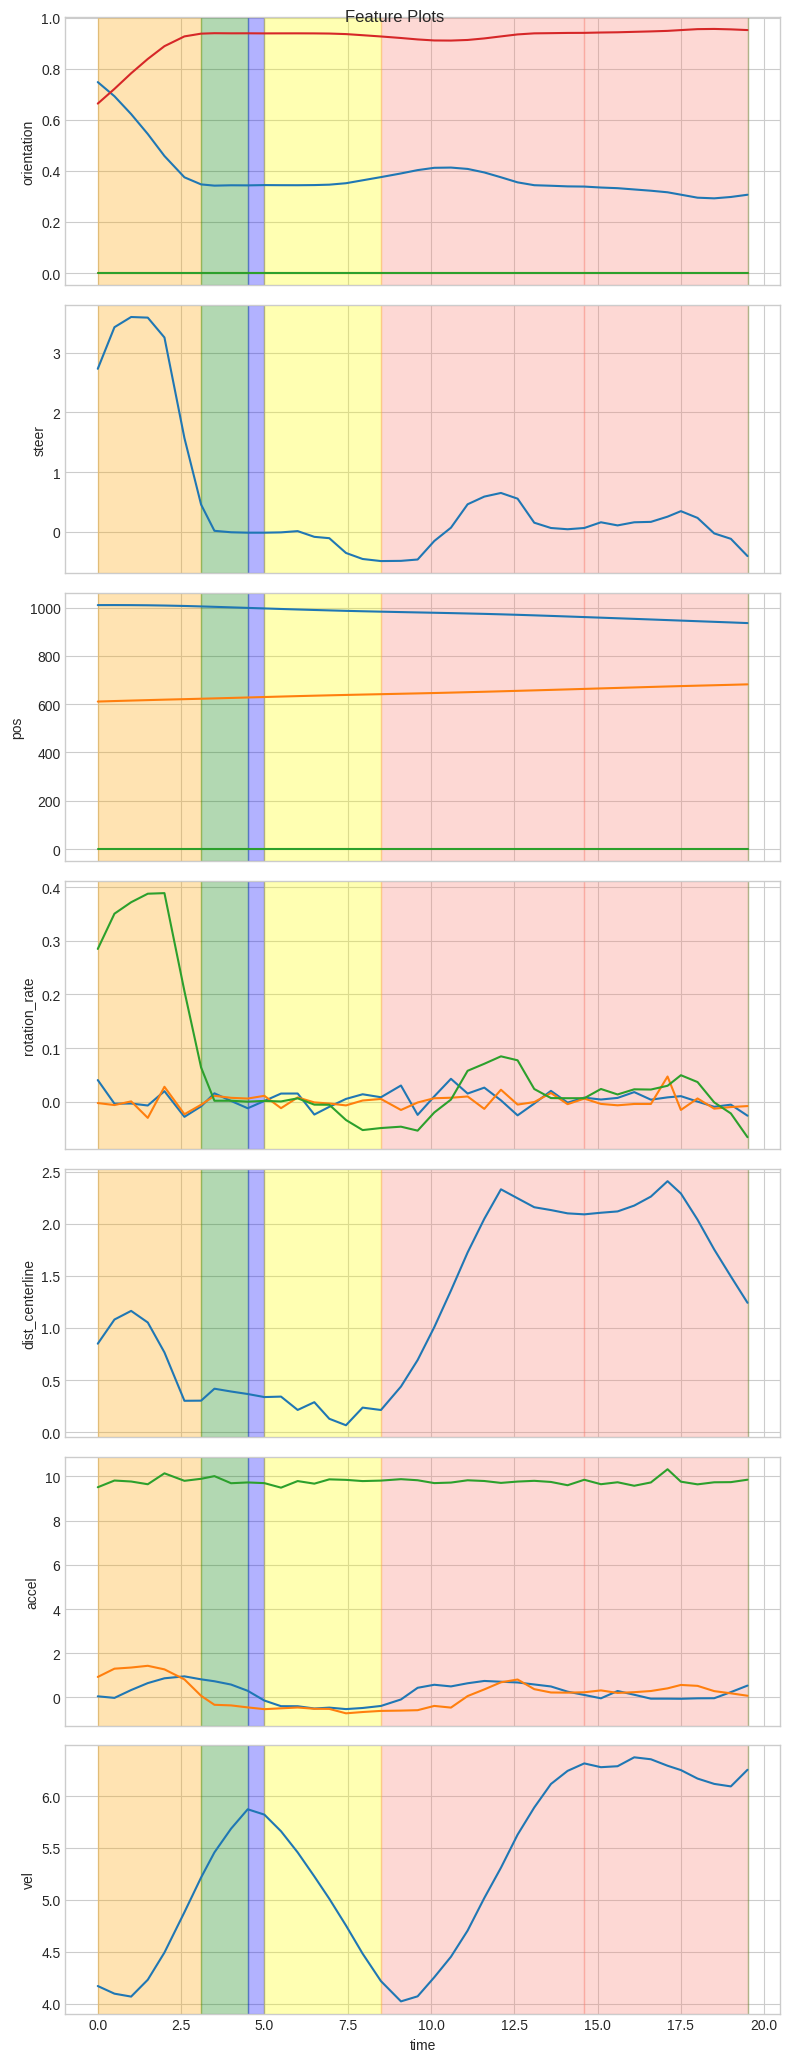

[{'token': 'e93e98b63d3b40209056d129dc53ceee', 'accel': [0.05252802768009661, 0.9291747528573647, 9.513756543139106], 'orientation': [0.7479305678167669, 0.0, 0.0, 0.6637769698666026], 'pos': [1010.1436201720262, 610.8882352282457, 0.0], 'rotation_rate': [0.040320225059986115, -0.002563952235504985, 0.28492140769958496], 'vel': 4.1688763951334185, 'steer': 2.7331856086231183, 'dist_centerline': 0.8486396282834165, 'closest_lane': '30ec1dee-99fe-49d2-8deb-aaf5849bf1d1', 'time': 0.0}, {'token': '14d5adfe50bb4445bc3aa5fe607691a8', 'accel': [-0.018800488295477057, 1.3031372601351852, 9.817341383136286], 'orientation': [0.6925665937583287, 0.0, 0.0, 0.7213539444752389], 'pos': [1010.2594832132028, 612.9673465945551, 0.0], 'rotation_rate': [-0.0037637099158018827, -0.0063256872817873955, 0.35068368911743164], 'vel': 4.095219624058002, 'steer': 3.4313173094208502, 'dist_centerline': 1.0801779838957508, 'closest_lane': '30ec1dee-99fe-49d2-8deb-aaf5849bf1d1', 'time': 0.50044}, {'token': 'ae4e0c

In [4]:
s.plot_actions()
print(s.data)

In [5]:
plt.ioff()
s.render_actions_map('%s.gif' % s.scene_name)
plt.ion()

/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1012: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


In [2]:
scene_names = []
for i in range(2000):
    if i in nusc_can.can_blacklist:
        continue
    scene_name = 'scene-%s' % str(i).zfill(4)
    scene = [ i for i in nusc.scene if scene_name in i['name'].lower() ]
    if len(scene) > 0:
        scene_names.append(scene_name)

scene_names

['scene-0001',
 'scene-0002',
 'scene-0003',
 'scene-0004',
 'scene-0005',
 'scene-0006',
 'scene-0007',
 'scene-0008',
 'scene-0009',
 'scene-0010',
 'scene-0011',
 'scene-0012',
 'scene-0013',
 'scene-0014',
 'scene-0015',
 'scene-0016',
 'scene-0017',
 'scene-0018',
 'scene-0019',
 'scene-0020',
 'scene-0021',
 'scene-0022',
 'scene-0023',
 'scene-0024',
 'scene-0025',
 'scene-0026',
 'scene-0027',
 'scene-0028',
 'scene-0029',
 'scene-0030',
 'scene-0031',
 'scene-0032',
 'scene-0033',
 'scene-0034',
 'scene-0035',
 'scene-0036',
 'scene-0038',
 'scene-0039',
 'scene-0041',
 'scene-0042',
 'scene-0043',
 'scene-0044',
 'scene-0045',
 'scene-0046',
 'scene-0047',
 'scene-0048',
 'scene-0049',
 'scene-0050',
 'scene-0051',
 'scene-0052',
 'scene-0053',
 'scene-0054',
 'scene-0055',
 'scene-0056',
 'scene-0057',
 'scene-0058',
 'scene-0059',
 'scene-0060',
 'scene-0061',
 'scene-0062',
 'scene-0063',
 'scene-0064',
 'scene-0065',
 'scene-0066',
 'scene-0067',
 'scene-0068',
 'scene-00

In [3]:
scenes = []
for i,scene_name in enumerate(scene_names):
    s = Scene(scene_name)
    scenes.append(s)
    s.extract_data(map=False)
    s.segment_actions(primitive=True)
    print(i, s.prim_actions)


0 [{'label': 'turn left', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 6, 'time': 3.100987}, {'label': 'drive straight', 'index': 9, 'time': 4.4999769999999994}, {'label': 'decelerate', 'index': 10, 'time': 4.999306}, {'label': 'drive straight', 'index': 18, 'time': 9.098956}, {'label': 'accelerate', 'index': 19, 'time': 9.599376}, {'label': 'drive straight', 'index': 28, 'time': 14.099924}, {'label': 'accelerate', 'index': 38, 'time': 18.999703999999998}, {'label': 'END', 'index': 39, 'time': 19.49957}]
1 [{'label': 'turn left', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 13, 'time': 6.451377}, {'label': 'drive straight', 'index': 18, 'time': 9.000525}, {'label': 'decelerate', 'index': 20, 'time': 9.949961}, {'label': 'accelerate', 'index': 29, 'time': 14.599253}, {'label': 'END', 'index': 39, 'time': 19.500185}]
2 [{'label': 'stop', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 5, 'time': 2.450172}, {'label': 'drive straight', 'index': 10, 't

In [ ]:
total = [76, 185, 328, 632, 778, 1089]
valid = [778]
bad = [76, 185, 328, 632, 1089]


uturn_scene = [ i for i in scenes if i.scene_name == 'scene-1089' ][0]
uturn_scene.plot_actions()


In [ ]:
plt.ioff()
uturn_scene.render_actions_map("%s.gif" % uturn_scene.scene_name)